## K-Means clustering

Learn how to create clusters using Scikit-learn and the Nigerian music dataset. We will cover the basics of K-Means for Clustering. There are many ways to work with clusters and the method we use depends on your data. We will try K-Means as it's the most common clustering technique.

K-Means Clustering is a method derived from the domain of signal processing. It is used to divide and partition groups of data into 'k' clusters using a series of observations. Each observation works to group a given datapoint closest to its nearest 'mean', or the center point of a cluster.

The clusters can be visualized as Voronoi diagrams, which include a point (or 'seed') and its corresponding region.


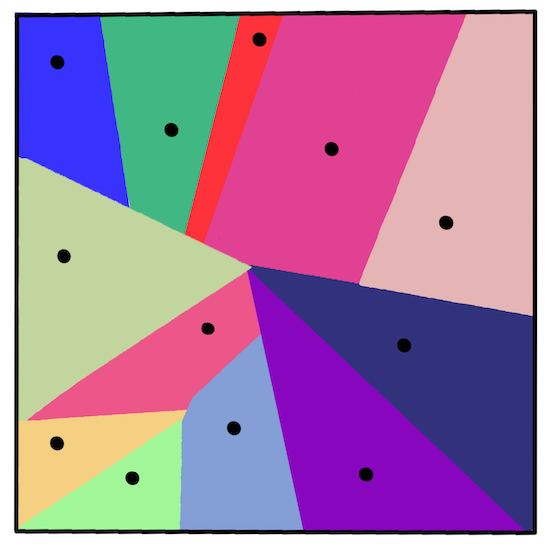


The K-Means clustering process executes in a three-step process:

The algorithm selects k-number of center points by sampling from the dataset. After this, it loops:
1) It assigns each sample to the nearest centroid.
2) It creates new centroids by taking the mean value of all of the samples assigned to the previous centroids.
3) Then, it calculates the difference between the new and old centroids and repeats until the centroids are stabilized.

One drawback of using K-Means includes the fact that you will need to establish 'k', that is the number of centroids. Fortunately the 'elbow method' helps to estimate a good starting value for 'k'.



# Nigerian Music scraped from Spotify - an analysis

In [1]:
# Seaborn 패키지 설치
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Start where we finished in the last lesson, with data imported and filtered.

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 빈 데이터프레임을 생성
combined_df = pd.DataFrame()

# 현재 작업 경로 확인
current_directory = os.getcwd()
print(current_directory)

/workspaces/ml202401-midterm-taehyunkim32


In [3]:
# 디렉토리 내의 모든 파일을 읽어 하나의 데이터 프레임으로 연결
directory = './Data'
for filename in sorted(os.listdir(directory)):
    if filename.endswith(".csv"):
        #인코딩은 'euc-kr'로 설정
        df = pd.read_csv(os.path.join(directory, filename), encoding='euc-kr')
        # 읽어들인 데이터 프레임을 추가
        combined_df = pd.concat([combined_df, df], ignore_index=True)

# 읽어온 데이터 프레임 확인
print("========== 서울특별시_따릉이 대여소별 대여 반납 승객수 정보 ==========")
print(combined_df)

========== 서울특별시_따릉이 대여소별 대여 반납 승객수 정보 ==========
            기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0        20240301  출발시간       0   ST-1002   목1동_004_1    ST-431   목4동_048_1   
1        20240301  출발시간       0    ST-102  자양1동_003_1    ST-983  중곡1동_022_1   
2        20240301  출발시간       0   ST-1032  불광1동_058_1   ST-1032  불광1동_058_1   
3        20240301  출발시간       0   ST-1032  불광1동_058_1         X         NaN   
4        20240301  출발시간       0   ST-1046  성내2동_015_1   ST-1838  천호3동_040_2   
...           ...   ...     ...       ...         ...       ...         ...   
6082591  20240331  도착시간    2355    ST-943  을지로동_003_1    ST-152    필동_004_1   
6082592  20240331  도착시간    2355    ST-944    필동_008_2    ST-214   공덕동_011_1   
6082593  20240331  도착시간    2355    ST-950   조원동_032_1    ST-670  구로4동_024_1   
6082594  20240331  도착시간    2355    ST-984  자양1동_008_1   ST-2542   화양동_039_1   
6082595  20240331  도착시간    2355     ST-99  자양3동_050_1   ST-2546  자양2동_041_1   

 

In [4]:
# 데이터 프레임에서 NaN 값 개수 확인
nan_values = combined_df.isna().sum()
print(nan_values)

# NaN 값을 가진 행 삭제
combined_df.dropna(inplace=True)
print(combined_df)

기준_날짜            0
집계_기준            0
기준_시간대           0
시작_대여소_ID        0
시작_대여소명          0
종료_대여소_ID        0
종료_대여소명      30414
전체_건수            0
전체_이용_분          0
전체_이용_거리         0
dtype: int64
            기준_날짜 집계_기준  기준_시간대 시작_대여소_ID     시작_대여소명 종료_대여소_ID     종료_대여소명  \
0        20240301  출발시간       0   ST-1002   목1동_004_1    ST-431   목4동_048_1   
1        20240301  출발시간       0    ST-102  자양1동_003_1    ST-983  중곡1동_022_1   
2        20240301  출발시간       0   ST-1032  불광1동_058_1   ST-1032  불광1동_058_1   
4        20240301  출발시간       0   ST-1046  성내2동_015_1   ST-1838  천호3동_040_2   
5        20240301  출발시간       0   ST-1061  천호1동_039_1   ST-3248  둔촌2동_049_1   
...           ...   ...     ...       ...         ...       ...         ...   
6082591  20240331  도착시간    2355    ST-943  을지로동_003_1    ST-152    필동_004_1   
6082592  20240331  도착시간    2355    ST-944    필동_008_2    ST-214   공덕동_011_1   
6082593  20240331  도착시간    2355    ST-950   조원동_032_1    ST-670  구로4동_024_1   
6082594

### 데이터셋에서 사용하지 않을 열 제거

#### 데이터프레임의 열에 대한 설명:

- 기준_날짜: 사용된 날짜
- 집계_기준: 특정 기준시간대에 [A대여소에서 대여->B대여소에서 반납]한 총 이용건수. 출발시간과 도착시간을 기준으로 기록되어 있으며, 출발 시간을 기준으로만 사용.
- 기준_시간대: 대여를 시작한 시간, 데이터 예시에서 0005는 0시 5분을 나타냄.
- 시작_대여소_ID: 출발한 대여소의 ID, 지역별 수요를 확인하기 위해 ID는 사용하지 않음.
- 시작_대여소명: 출발한 대여소의 이름. 지역별 수요를 확인하기 위해 동 이름으로 수정.
- 종료_대여소_ID: 도착한 대여소의 ID. 지역별 수요를 확인하기 위해 ID는 사용하지 않음.
- 전체_건수: 특정 기준시간대에 [A대여소에서 대여->B대여소에서 반납]한 총 이용건수.
- 전체_이용_분: 해당 건수에 이용된 총 시간(분).
- 전체_이용_거리: 해당 건수에 대해 이동한 총 거리(미터).

In [5]:
# 사용하지 않을 열들을 삭제
unused_columns = ['집계_기준', '시작_대여소_ID', '종료_대여소_ID']
seoul_bike_df = combined_df.drop(columns=unused_columns)

# 결과를 확인합니다.
print(seoul_bike_df)

            기준_날짜  기준_시간대     시작_대여소명     종료_대여소명  전체_건수  전체_이용_분  전체_이용_거리
0        20240301       0   목1동_004_1   목4동_048_1      1       11      1160
1        20240301       0  자양1동_003_1  중곡1동_022_1      1       19      3619
2        20240301       0  불광1동_058_1  불광1동_058_1      1      122      6062
4        20240301       0  성내2동_015_1  천호3동_040_2      1        4       613
5        20240301       0  천호1동_039_1  둔촌2동_049_1      1       12      1469
...           ...     ...         ...         ...    ...      ...       ...
6082591  20240331    2355  을지로동_003_1    필동_004_1      1        5      1060
6082592  20240331    2355    필동_008_2   공덕동_011_1      1        4      3533
6082593  20240331    2355   조원동_032_1  구로4동_024_1      1       24      2305
6082594  20240331    2355  자양1동_008_1   화양동_039_1      1        7      1465
6082595  20240331    2355  자양3동_050_1  자양2동_041_1      1       36      1209

[6052182 rows x 7 columns]


In [6]:
# 열 이름 변경
seoul_bike_df.rename(columns={'기준_날짜': '대여_날짜',
                            '기준_시간대': '대여_시간',
                            '시작_대여소명': '출발_대여소',
                            '종료_대여소명': '종료_대여소',
                            '전체_건수': '총_이용_건수',
                            '전체_이용_분': '총_이용_시간(분)',
                            '전체_이용_거리': '총_이용_거리(미터)'}, inplace=True)

# 대여_시간 열의 데이터 타입을 문자열로 변환 (0000이 0으로 보이는 문제를 해결하기 위해 적용)
seoul_bike_df['대여_시간'] = seoul_bike_df['대여_시간'].astype(str)
print(seoul_bike_df)

            대여_날짜 대여_시간      출발_대여소      종료_대여소  총_이용_건수  총_이용_시간(분)  \
0        20240301     0   목1동_004_1   목4동_048_1        1          11   
1        20240301     0  자양1동_003_1  중곡1동_022_1        1          19   
2        20240301     0  불광1동_058_1  불광1동_058_1        1         122   
4        20240301     0  성내2동_015_1  천호3동_040_2        1           4   
5        20240301     0  천호1동_039_1  둔촌2동_049_1        1          12   
...           ...   ...         ...         ...      ...         ...   
6082591  20240331  2355  을지로동_003_1    필동_004_1        1           5   
6082592  20240331  2355    필동_008_2   공덕동_011_1        1           4   
6082593  20240331  2355   조원동_032_1  구로4동_024_1        1          24   
6082594  20240331  2355  자양1동_008_1   화양동_039_1        1           7   
6082595  20240331  2355  자양3동_050_1  자양2동_041_1        1          36   

         총_이용_거리(미터)  
0               1160  
1               3619  
2               6062  
4                613  
5               1469

In [7]:
# 출발_대여소 열과 종료_대여소 열의 데이터 처리
seoul_bike_df['출발_대여소'] = seoul_bike_df['출발_대여소'].str.split('_').str[0]

In [8]:
seoul_bike_df['종료_대여소'] = seoul_bike_df['종료_대여소'].str.split('_').str[0]

print(seoul_bike_df)

            대여_날짜 대여_시간 출발_대여소 종료_대여소  총_이용_건수  총_이용_시간(분)  총_이용_거리(미터)
0        20240301     0    목1동    목4동        1          11         1160
1        20240301     0   자양1동   중곡1동        1          19         3619
2        20240301     0   불광1동   불광1동        1         122         6062
4        20240301     0   성내2동   천호3동        1           4          613
5        20240301     0   천호1동   둔촌2동        1          12         1469
...           ...   ...    ...    ...      ...         ...          ...
6082591  20240331  2355   을지로동     필동        1           5         1060
6082592  20240331  2355     필동    공덕동        1           4         3533
6082593  20240331  2355    조원동   구로4동        1          24         2305
6082594  20240331  2355   자양1동    화양동        1           7         1465
6082595  20240331  2355   자양3동   자양2동        1          36         1209

[6052182 rows x 7 columns]


In [9]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

X = seoul_bike_df[['대여_날짜', '대여_시간', '출발_대여소', '종료_대여소', '총_이용_건수', '총_이용_시간(분)', '총_이용_거리(미터)']]

# 출발_대여소와 종료_대여소를 라벨 인코딩으로 변환
le = LabelEncoder()
X['출발_대여소'] = le.fit_transform(X['출발_대여소'])
X['종료_대여소'] = le.fit_transform(X['종료_대여소'])

In [10]:
# KMeans 클러스터링 알고리즘
from sklearn.cluster import KMeans

# 샘플링
X = X.sample(n=10000, random_state=42)

# 클러스터 수와 랜덤 시드 설정
nclusters = 3 
seed = 0

# KMeans 모델 생성 및 훈련
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X)

# 각 데이터 점에 대한 클러스터 예측
y_cluster_kmeans = km.predict(X)
y_cluster_kmeans

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [11]:
from sklearn import metrics

# Silhouette Score 계산
score = metrics.silhouette_score(X, y_cluster_kmeans)
print(f"Silhouette Score: {score}")

: 

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(data=(range(1, 11), wcss), marker='o', color='red')
plt.title('Elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()